In [80]:
# Módulos importados para o funcionamento deste código;

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from numpy import arange
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import Ridge, Lasso

In [3]:
# Linha que imorta o arquivo que contém o dataset;

dados = pd.read_csv('Dataset_Final.csv')

In [4]:
# Código para embaralhar as linhas do dataset;

dados = shuffle(dados)

In [101]:
# Colunas com os dados que serão analisados pelas regressões;

atributos = ["Idade", "Qualidade", "Potencial","Preço", "Especial", "Drible", "Finalização", "Marcação", "Visão", "Interceptação"
             , "Cruzamento", "Bote", "Posicionamento", "Cabeceio"]
y = ["Salário"]

In [6]:
# Limpar o dataset;

for i in atributos:
    dados = dados[dados[i] != 0] 
dados = dados.dropna()


# Separa o dataset, 80% para treinamento e 20% para teste;

train, test = train_test_split(dados, test_size=0.2)


In [7]:
# Função que realiza a regressão Ridge;

def ridge_regression(train, atributos, alpha):
    ridgereg = Ridge(alpha=alpha,normalize=True)
    ridgereg.fit(train[atributos],train['Salário'])
    y_pred = ridgereg.predict(train[atributos])
    return(y_pred)

In [8]:
# Estudo para escolher o melhor alpha para a regressão;

alphas = [10, 5, 2, 1, 0.01, 0.001, 0.0001, 1e-10, 1e-15]

for valor in alphas:
    Regressão_Ridge = ridge_regression(train, atributos, valor)
    print((mean_squared_error(train['Salário'],Regressão_Ridge))**(1/2))

20459.6100316
19366.2390002
17869.2458797
16995.2156254
16111.1883285
16109.4533378
16109.427369
16109.4270939
16109.4270939


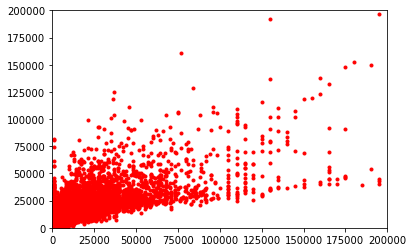

In [71]:
# Uso do melhor alpha para fazer o gráfico;

R_R = ridge_regression(train, atributos, 0.001)

plt.plot(train['Salário'],R_R,'.', color="red")
plt.axis([0, 200000, 0, 200000])
plt.show()

In [10]:
# Função que realiza a regressão Lasso;

def lasso_regression(train, atributos, alpha):
    lassoreg = Lasso(alpha=alpha,normalize=True)
    lassoreg.fit(train[atributos],train['Salário'])
    y_predl = lassoreg.predict(train[atributos])
    return(y_predl)

In [11]:
# Estudo para escolher o melhor alpha para a regressão;

alphas = [10, 5, 2, 1, 0.01, 0.001, 0.0001]

for valor in alphas:
    Regressão_Lasso = lasso_regression(train, atributos, valor)
    print((mean_squared_error(train['Salário'],Regressão_Lasso))**(1/2))

16202.6670772
16155.6260238
16139.0197858
16132.3463205
16109.4339699
16109.4271679
16109.4270947


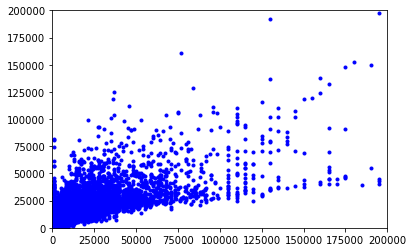

In [51]:
# Uso do melhor alpha para fazer o gráfico;

R_L = lasso_regression(train, atributos, 0.01)
plt.plot(train['Salário'],R_L,'.', color="blue")
plt.axis([0, 200000, 0, 200000])
plt.show()

In [13]:
# Uso dos conhecimentos obtidos durante o treino para realizar o teste de regressão Ridge;

alpha = 0.001

r_R = ridge_regression(test, atributos, alpha)
print((mean_squared_error(test['Salário'],r_R))**(1/2))

18135.8738738


In [14]:
# Uso dos conhecimentos obtidos durante o treino para realizar o teste de regressão Lasso; 

alpha = 0.01

r_L = lasso_regression(test, atributos, alpha)
print((mean_squared_error(test['Salário'],r_L))**(1/2))

18135.8624633


In [93]:
np.sum(abs((train.Salário - R_R)/train.Salário))*(100/len(train))

224.63080076079072

In [94]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet as ElasticNetImpl

In [109]:
parameters = {'alpha': 10**np.linspace(-2, 10, 20),
              'l1_ratio': np.linspace(0.01, 1, 10)}

In [110]:
clf = GridSearchCV(ElasticNetImpl(normalize=True), parameters, cv=20, n_jobs=-1, scoring='neg_mean_absolute_error')

In [111]:
clf.fit(train[atributos],train['Salário'])

GridSearchCV(cv=20, error_score='raise',
       estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=True, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'alpha': array([  1.00000e-02,   1.32194e-02, ...,   7.56463e+09,   1.00000e+10]), 'l1_ratio': array([ 0.01   ,  0.05125,  0.0925 ,  0.13375,  0.175  ,  0.21625,
        0.2575 ,  0.29875,  0.34   ,  0.38125,  0.4225 ,  0.46375,
        0.505  ,  0.54625,  0.5875 ,  0.62875,  0.67   ,  0.71125,
        0.7525 ,  0.79375,  0.835  ,  0.87625,  0.9175 ,  0.95875,  1.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=0)

In [112]:
clf.cv_results_['mean_test_score']

array([-11747.03861029, -11737.85913134, -11727.89384022, ...,
       -11970.45223512, -11970.45223512, -11970.45223512])

In [113]:
clf.cv_results_['std_test_score']

array([ 705.10772675,  705.03065503,  704.95368568, ...,  706.65822696,
        706.65822696,  706.65822696])

In [114]:
clf.cv_results_['params']

({'alpha': 0.01, 'l1_ratio': 0.01},
 {'alpha': 0.01, 'l1_ratio': 0.051250000000000004},
 {'alpha': 0.01, 'l1_ratio': 0.092499999999999999},
 {'alpha': 0.01, 'l1_ratio': 0.13375000000000001},
 {'alpha': 0.01, 'l1_ratio': 0.17500000000000002},
 {'alpha': 0.01, 'l1_ratio': 0.21625000000000003},
 {'alpha': 0.01, 'l1_ratio': 0.25750000000000001},
 {'alpha': 0.01, 'l1_ratio': 0.29875000000000002},
 {'alpha': 0.01, 'l1_ratio': 0.34000000000000002},
 {'alpha': 0.01, 'l1_ratio': 0.38125000000000003},
 {'alpha': 0.01, 'l1_ratio': 0.42250000000000004},
 {'alpha': 0.01, 'l1_ratio': 0.46375000000000005},
 {'alpha': 0.01, 'l1_ratio': 0.505},
 {'alpha': 0.01, 'l1_ratio': 0.54625000000000001},
 {'alpha': 0.01, 'l1_ratio': 0.58750000000000002},
 {'alpha': 0.01, 'l1_ratio': 0.62875000000000003},
 {'alpha': 0.01, 'l1_ratio': 0.67000000000000004},
 {'alpha': 0.01, 'l1_ratio': 0.71125000000000005},
 {'alpha': 0.01, 'l1_ratio': 0.75250000000000006},
 {'alpha': 0.01, 'l1_ratio': 0.79375000000000007},
 {'alph

In [115]:
modelo_good = clf.best_estimator_

In [129]:
y_pred = modelo_good.predict(test[atributos])

In [130]:
y_pred

array([ 15667.60782004,  18261.89571043,  21460.39189999, ...,
         7779.65244609,   2058.26561837,     54.159963  ])

In [133]:
np.sqrt(mean_squared_error(test.Salário, y_pred))

18757.918116598161

In [134]:
mean_absolute_error(test.Salário, y_pred)

8198.073008877167

In [135]:
np.sum(abs((test.Salário - y_pred)/test.Salário))*(100/len(test))

184.59663885701883